# Boositng example Group 4: Use SciKit's AdaBoostClassifier

This Colab is based on work by

https://www.kaggle.com/code/faressayah/ensemble-ml-algorithms-bagging-boosting-voting#Boosting-Algorithms

Dataset (diabetes.csv)

https://www.kaggle.com/datasets/saurabh00007/diabetescsv?resource=download

Proposed method, **AdaBoostClassifier**

https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

#Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Loading data

In [ ]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

## Column / variables in our data matrix X

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Check missing or incomplete data

In [ ]:
# How many missing zeros are missing in each feature
feature_columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


## Correction: replace missing zeros in the dataset with the mean of the respective columns

In [ ]:
from sklearn.impute import SimpleImputer


fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)
df[feature_columns] = fill_values.fit_transform(df[feature_columns])

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 0
Glucose ==> Missing zeros : 0
BloodPressure ==> Missing zeros : 0
SkinThickness ==> Missing zeros : 0
Insulin ==> Missing zeros : 0
BMI ==> Missing zeros : 0
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


## Split into training set (70 %) and test set (30 %)

In [ ]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

## Use AdaBoostClassifier, (Adaptive Boosting Classifier)

which is an **ensemble machine learning algorithm** that combines multiple weak classifiers to create a strong classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
# Arguments:

# n_estimators: number of recursive ensemble models
# estimator: If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1
# learning_rate: controls the contribution of the weak learner to the final prediction.

# Arguments can be found in https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html



ada_boost_clf.fit(X_train, y_train)

# <-- During this above process, each weak learner focuses on the errors
# made by the previous learners, gradually improving the overall performance of the model

evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


TRAINIG RESULTS: 
ACCURACY SCORE:
0.8324
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.86   0.78      0.83       0.82          0.83
recall      0.89   0.73      0.83       0.81          0.83
f1-score    0.87   0.75      0.83       0.81          0.83
support   349.00 188.00      0.83     537.00        537.00
TESTING RESULTS: 
ACCURACY SCORE:
0.7619
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.82  0.65      0.76       0.74          0.76
recall      0.81  0.66      0.76       0.74          0.76
f1-score    0.82  0.66      0.76       0.74          0.76
support   151.00 80.00      0.76     231.00        231.00


In [ ]:
# X_train

In [ ]:
# y_train

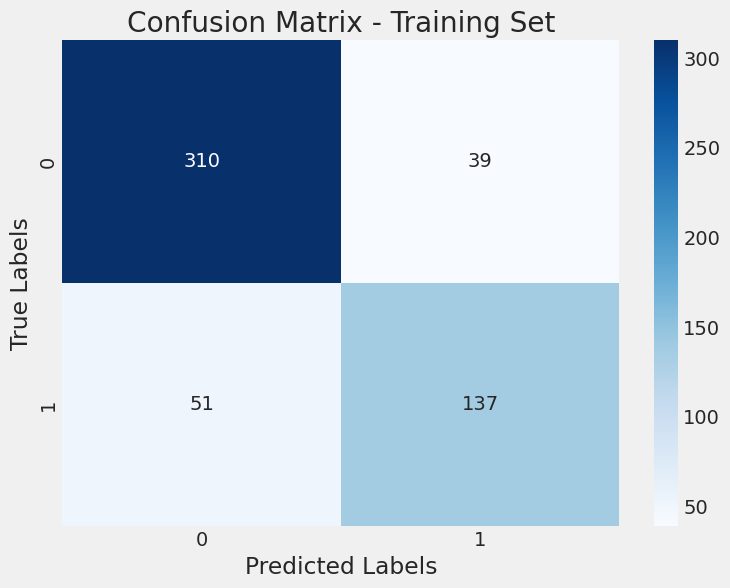

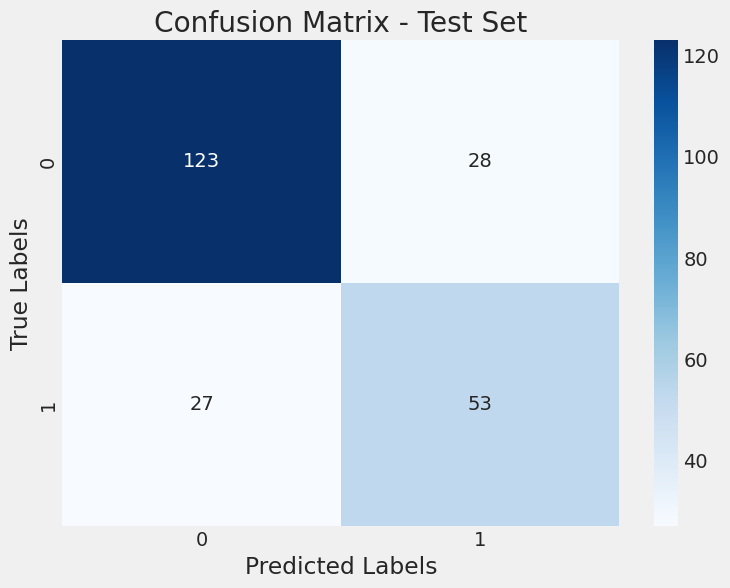

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
y_pred_train = ada_boost_clf.predict(X_train)
y_pred_test = ada_boost_clf.predict(X_test)

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Visualize Glucose plot

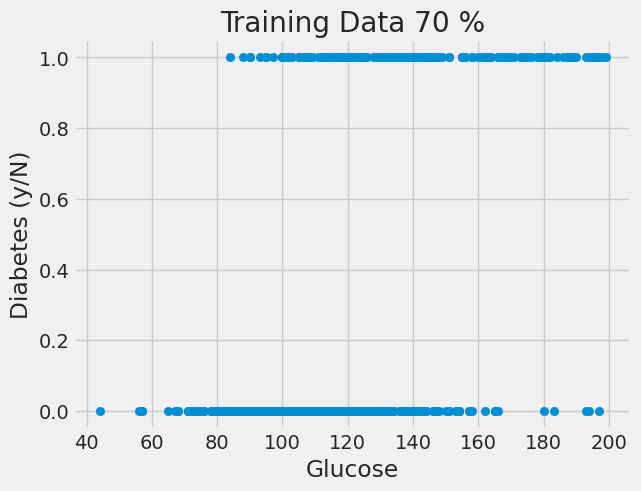

In [ ]:
plt.scatter(X_train['Glucose'],y_train) # Create scatter plot
plt.title("Training Data 70 %")
plt.xlabel("Glucose")
plt.ylabel("Diabetes (y/N)")
plt.show()

## Visualize Blood Pressure plot

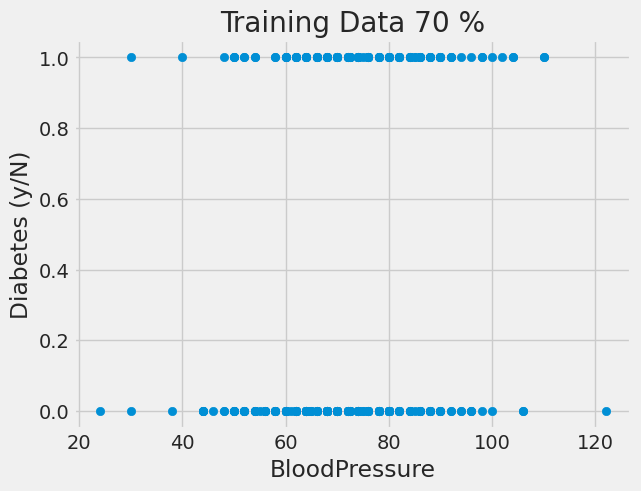

In [ ]:
plt.scatter(X_train['BloodPressure'],y_train) # Create scatter plot
plt.title("Training Data 70 %")
plt.xlabel("BloodPressure")
plt.ylabel("Diabetes (y/N)")
plt.show()

## Visualize BMI plot

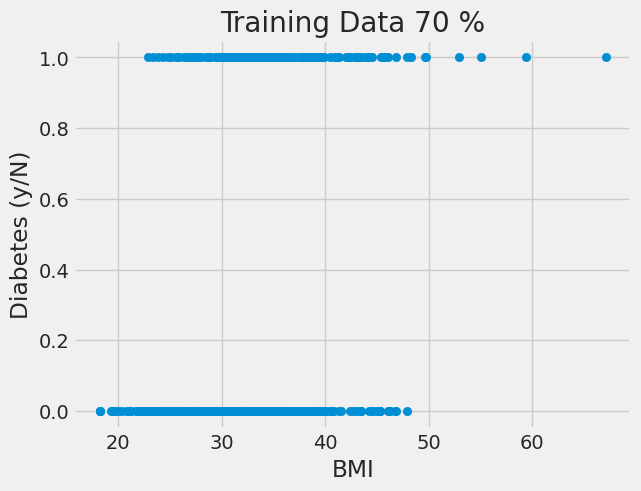

In [ ]:
plt.scatter(X_train['BMI'],y_train) # Create scatter plot
plt.title("Training Data 70 %")
plt.xlabel("BMI")
plt.ylabel("Diabetes (y/N)")
plt.show()

# Bagging (outdated)

## Libraries

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}